In [1]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
df = df.drop(columns=['CustomerID','MinD', 'MaxD','Ts'])
df.head()

,I,Iu,Imax,E,PIL,Mb,MeanD,EDate
0,1707,21,12,4.335643,2.567,156.860294,0.000000,0.000000
1,1386,105,32,6.503112,2.567,356.232222,35.000000,2.226424
2,4992,113,360,6.504979,2.752,442.969333,24.266667,2.235084
3,439,24,80,4.494680,2.567,189.650000,55.400000,1.177965
4,80,1,32,0.000000,2.567,292.000000,13.000000,0.918296


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:5])

[[8.67950446e-03 1.14025086e-02 2.29214420e-03 4.18976976e-01
  1.67671736e-01 5.78415905e-03 0.00000000e+00 0.00000000e+00]
 [7.04637379e-03 5.92930445e-02 6.45967910e-03 6.28431304e-01
  1.67671736e-01 1.31542413e-02 1.91780822e-01 9.61982496e-01]
 [2.53923838e-02 6.38540479e-02 7.48072515e-02 6.28611740e-01
  1.79798112e-01 1.63606087e-02 1.32968037e-01 9.65724206e-01]
 [2.22838391e-03 1.31128848e-02 1.64617629e-02 4.34345594e-01
  1.67671736e-01 6.99627969e-03 3.03561644e-01 5.08969615e-01]
 [4.01923126e-04 0.00000000e+00 6.45967910e-03 0.00000000e+00
  1.67671736e-01 1.07798009e-02 7.12328767e-02 3.96772868e-01]]


In [6]:
from sklearn import metrics
def plot_method(method="",clusters_max=2,plot_pair=False):
        silhouette_list = []
        k_list = []
        best=[0,0]
        ###### Compute metric values######\n",
        best_labels = []
        for k in range(2, clusters_max+ 1):
            hierarchical = AgglomerativeClustering(n_clusters=k,compute_full_tree='complete', linkage=method)
            hierarchical.fit(X)
            ###### Compute silhouette ######\n",
            silhouette=silhouette_score(X, hierarchical.labels_)
            silhouette_list.append(silhouette)
            k_list.append(k)
            if(silhouette>best[1]):
                best_labels = hierarchical.labels_
                best[1] = silhouette
                best[0] = k
                print(np.unique(hierarchical.labels_, return_counts=True))
                print("Best number cluster: "+str(best[0])+" silhouette: "+str(best[1]))
                ###### Compute separation ######\n",
                print('Separation %s' % metrics.davies_bouldin_score(X, hierarchical.labels_))

        temp = pd.DataFrame(X) 
        temp.columns = ["I","Iu","Imax", "E"  ,"PIL", "Mb", "MeanD"  ,"EDate"] 
        ###### Plot silhouette ######   \n",
        plt.bar(k_list,silhouette_list)
        plt.title("Hierarchical Clustering - Method: "+method),
        plt.xlabel('Number of clusters', fontsize = 10) 
        plt.ylabel('Silhouette Score', fontsize = 10)
        plt.show()
        ###### Scatter plot pair column ######   \n",
        if(plot_pair):
            for pair in itertools.product(temp.columns, repeat=2):
                if(pair[0]!=pair[1]):
                    plt.scatter(temp[pair[0]], temp[pair[1]],
                            c = AgglomerativeClustering(n_clusters = best[0]).fit_predict(temp), cmap =plt.cm.winter) 
                    plt.xlabel(pair[0], fontsize = 10) 
                    plt.ylabel(pair[1], fontsize = 10) 
                    plt.title("Hierarchical Clustering - Method: "+method)
                    plt.show() 
                    
        ###### Plot dendogram ######  \n",
        data_dist = pdist(X, metric='euclidean')
        data_link = linkage(data_dist, method=method, metric='euclidean')
        dendrogram(data_link, color_threshold=0.8, truncate_mode='lastp')
        return best_labels

(array([0, 1], dtype=int64), array([2441, 3134], dtype=int64))
Best number cluster: 2 silhouette: 0.5672981930021745
Separation 0.6837924990296974


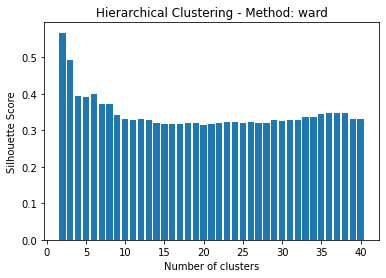

[1 0 0 ... 1 1 1]


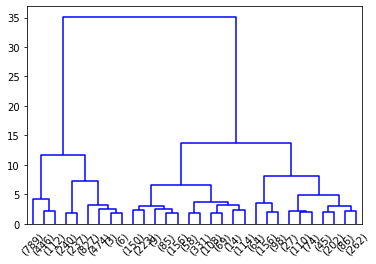

In [7]:
labels_ward = plot_method(method="ward",clusters_max=40,plot_pair=False)
print(labels_ward)

(array([0, 1], dtype=int64), array([4734,  841], dtype=int64))
Best number cluster: 2 silhouette: 0.38298810466969585
Separation 0.7660927979843891


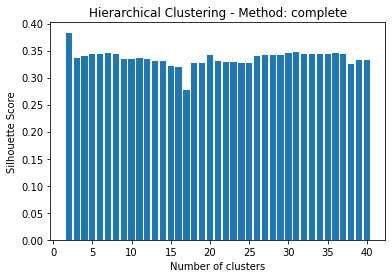

[0 1 1 ... 0 0 0]


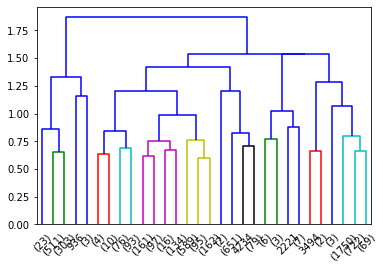

In [8]:
labels_complete =plot_method(method="complete",clusters_max=40,plot_pair=False)
print(labels_complete)

(array([0, 1], dtype=int64), array([5574,    1], dtype=int64))
Best number cluster: 2 silhouette: 0.6356910625009381
Separation 0.2794190573116015


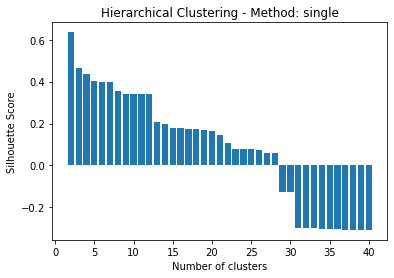

[0 0 0 ... 0 0 0]


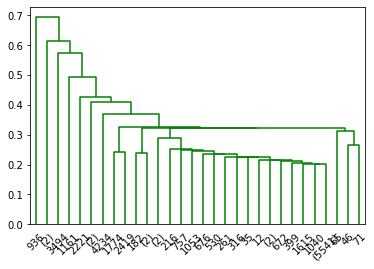

In [9]:
labels_single = plot_method(method="single",clusters_max=40,plot_pair=False)
print(labels_single)

(array([0, 1], dtype=int64), array([   5, 5570], dtype=int64))
Best number cluster: 2 silhouette: 0.5679217063136259
Separation 0.8019059392474049


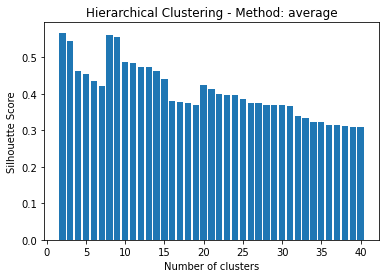

[1 1 1 ... 1 1 1]


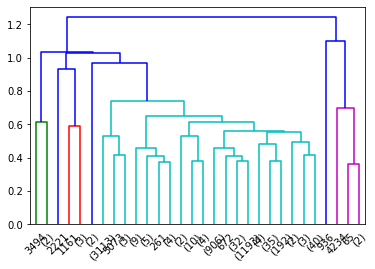

In [10]:
labels_average = plot_method(method="average",clusters_max=40,plot_pair=False)
print(labels_average)